# Exploration des données textuelles (titres et/ou résumés)

Ce notebook explore les données textuelles des résumés et titres de notices bibliographiques afin de voir si des patterns se dégagent rapidement

# Set project

### Packages

In [1]:
# Import librairies
import nltk
import pyLDAvis
#import pyLDAvis.sklearn
import spacy


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from utils_project import *
from utils_text_processing import *
from utils_visualization import *

2023-07-05 15:33:34.412227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/aurelie/anaconda3/envs/abes_index/lib/python3.10/site-packages/tensorflow/python/framework/dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
[nltk_data] Downloading package words to /home/aurelie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aurelie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aurelie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Graphical parameters

In [2]:
# Graphical parameters
%matplotlib inline

In [3]:
# Autorisation pour la visualisation par pyLDAvis
pyLDAvis.enable_notebook()

# Import data

In [4]:
# Input data
working_data_filename = "working_data_sans_dewey.pkl"
rameau_file = "rameau_Tf_Td.csv"
analyse_dewey = False

In [5]:
# Import data
df = pd.read_pickle(os.path.join(data_path, working_data_filename))
print(f"le Fichier de données contient {df.shape[0]} lignes et  {df.shape[1]} colonnes")

le Fichier de données contient 154447 lignes et  10 colonnes


In [6]:
# Visualisation
df.head()

,PPN,TITRE,RESUME,RAMEAU,DEWEY,DESCR,RAMEAU_CHECKED,presence_chaine_indexation,rameau_chaines_index,rameau_concepts
0,000002364,La culture pour vivre,Mort de la culture populaire en France. Mutati...,Culture populaire;Diffusion de la culture;Poli...,840,La culture pour vivre Mort de la culture popul...,Culture populaire;Diffusion de la culture;Poli...,False,"[Culture populaire, Diffusion de la culture, P...","[Culture populaire, Diffusion de la culture, P..."
1,000014877,"La nuit, le jour : essai psychanalytique sur l...","Discontinuité, latence, rétablissement d’une c...",Complexe de castration;Psychanalyse;Rêves,154.63,"La nuit, le jour : essai psychanalytique sur l...",Complexe de castration;Psychanalyse;Rêves,False,"[Complexe de castration, Psychanalyse, Rêves]","[Complexe de castration, Psychanalyse, Rêves]"
2,000021857,"Ruptures, cultures","Il faut imaginer Robinson sur son île, au mome...",Culture,840,"Ruptures, cultures Il faut imaginer Robinson s...",Culture,False,[Culture],[Culture]
3,00002564X,La révolution structurale,"Mutations ou crises, les brusques accès de fiè...",Structuralisme,100,"La révolution structurale Mutations ou crises,...",Structuralisme,False,[Structuralisme],[Structuralisme]
4,000026352,La Destruction du temple,"Oswald tire sur Kennedy. Jusque-là, c'est bon,...",Science-fiction américaine -- Traductions fran...,830,La Destruction du temple Oswald tire sur Kenne...,Science-fiction américaine -- Traductions fran...,True,[Science-fiction américaine -- Traductions fra...,"[Science-fiction américaine, Traductions franç..."


# Exploration des concepts

In [7]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), index_col=0)
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(10)

Nombre de notices différentes:  103628


,PPN,NOM,URI
0,157992527,Kirp?n,https://www.idref.fr/157992527
1,110140494,Militaires artistes,https://www.idref.fr/110140494
2,028492161,Militaires romains,https://www.idref.fr/028492161
3,028521757,Militaires prussiens,https://www.idref.fr/028521757
4,029895561,Sa-skya-pa,https://www.idref.fr/029895561
5,031875459,Militaires réunionnais,https://www.idref.fr/031875459
6,032370083,Construction à l'épreuve de la sécheresse,https://www.idref.fr/032370083
7,032878117,Missionnaires suisses,https://www.idref.fr/032878117
8,034423982,Militaires ivoiriens,https://www.idref.fr/034423982
9,034686940,Outils à métaux,https://www.idref.fr/034686940


In [8]:
chaines = flatten(df["rameau_chaines_index"])
keywords = flatten(df["rameau_concepts"])

print(f"Le dataset contient: \n - {len(set(keywords))} autorités RAMEAU differentes \n - {len(set(chaines))} chaines d'indexation différentes")

Le dataset contient: 
 - 25737 autorités RAMEAU differentes 
 - 68693 chaines d'indexation différentes


# Description des chaines d'indexation

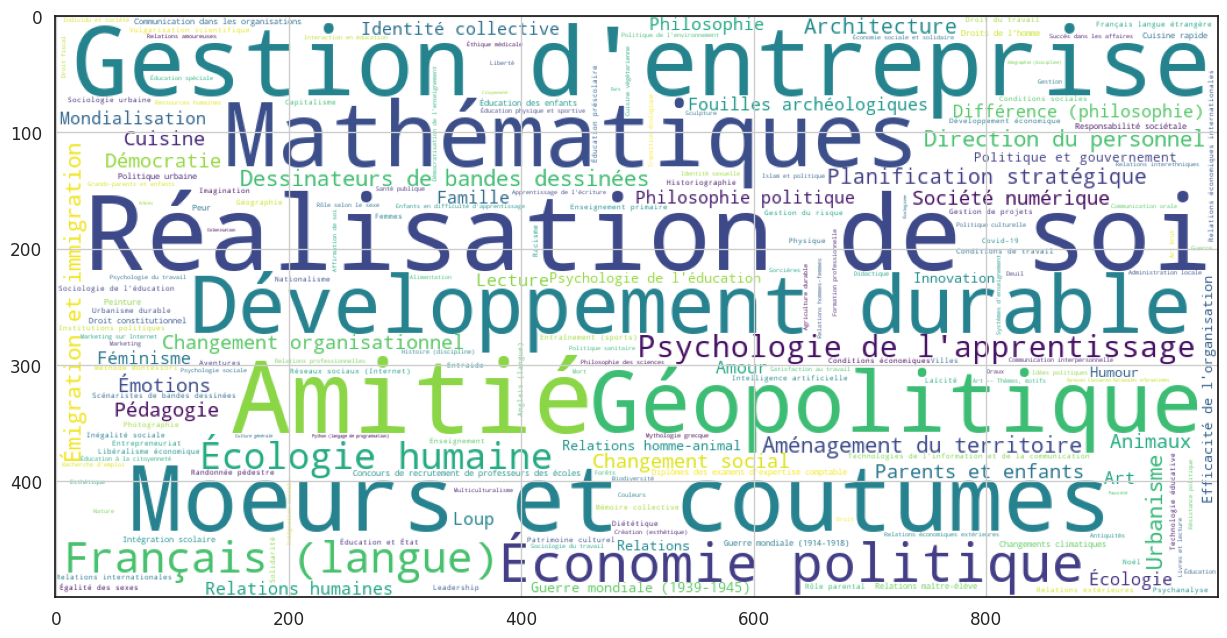

In [9]:
# Get list of chaines
plot_wordcloud(
    chaines,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_SUDOC_chaines.png",
)

# Description des concepts

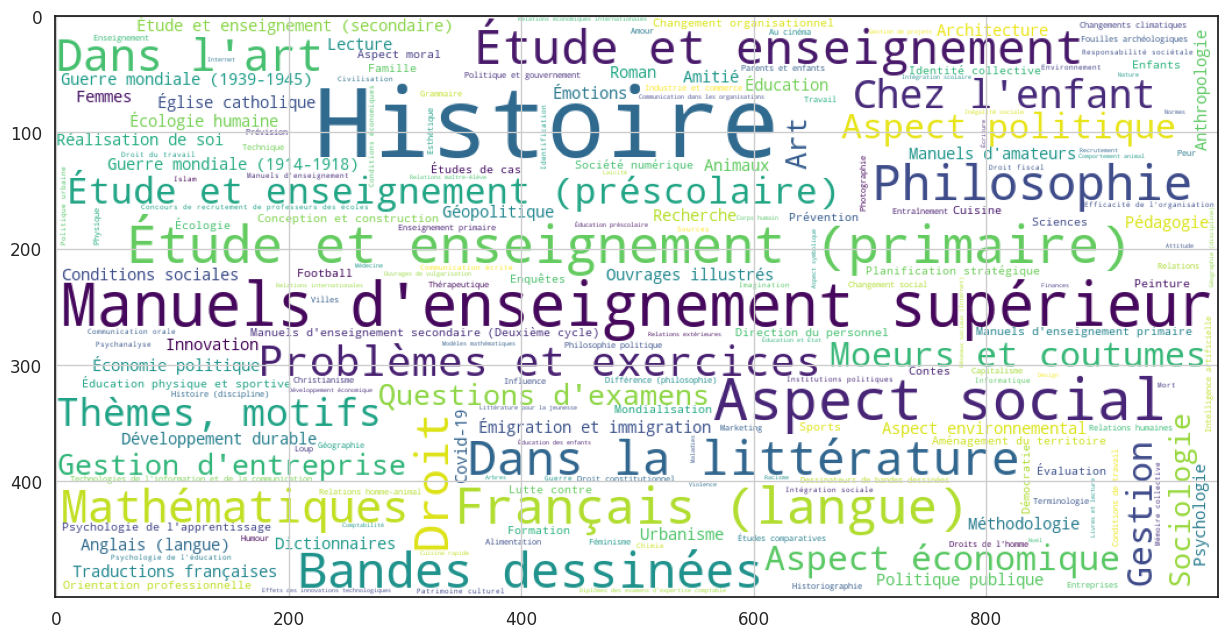

In [10]:
# Get list of labels
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_SUDOC_autorites.png",
)

# Exploration des Titres et résumés

# Exploration des titres

In [11]:
# List des stopwords
list(set(stopwords.words("french")))

['dans',
 'm',
 'ayante',
 'vos',
 'notre',
 'avaient',
 'êtes',
 'été',
 'aviez',
 'eût',
 'même',
 'c',
 'serions',
 'aient',
 'du',
 'fussent',
 'sommes',
 'seriez',
 'étantes',
 'ne',
 'mes',
 'moi',
 'aurai',
 'serais',
 'étions',
 'me',
 'étais',
 'soient',
 'pour',
 'étaient',
 'serai',
 'fût',
 'ayants',
 'eusse',
 'de',
 'il',
 'serez',
 'fusse',
 'seras',
 'ayons',
 'serons',
 'était',
 'étante',
 's',
 'tu',
 'étiez',
 'eues',
 'tes',
 'aurais',
 'à',
 'ont',
 'avez',
 'que',
 'eûmes',
 'eusses',
 'pas',
 'est',
 'aie',
 'sur',
 'se',
 'étée',
 'ta',
 'suis',
 'fus',
 'aurons',
 'soit',
 'ai',
 'fussions',
 'auront',
 'lui',
 'ayez',
 'par',
 'serait',
 'j',
 'y',
 'fussiez',
 'eurent',
 'leur',
 'fut',
 'ce',
 'eus',
 'mais',
 'seront',
 'eux',
 'ayant',
 'fûtes',
 'eussiez',
 'te',
 'qu',
 'étant',
 'avais',
 'as',
 'auraient',
 'ses',
 'auriez',
 'ton',
 'ayantes',
 'avait',
 'eue',
 'le',
 'seraient',
 'mon',
 'au',
 'sa',
 'étés',
 'des',
 'eussions',
 'en',
 'fusses',


In [12]:
# Test function
idx = 698
text = df.loc[idx, 'TITRE']
print(text)

Le voyage en Russie : anthologie des voyageurs français aux XVIIIe et XIXe siècles


In [13]:
# Exemple lemmatization
doc = nlp(text)
print("Sans lemmatization :", doc)

empty_list = []
for token in doc:
    empty_list.append(token.lemma_)

final_string = ' '.join(map(str,empty_list))
print("Après lemmatization :",final_string)

Sans lemmatization : Le voyage en Russie : anthologie des voyageurs français aux XVIIIe et XIXe siècles
Après lemmatization : le voyage en Russie : anthologie de voyageur français à xviii et xix siècle


In [14]:
process = PreprocessData(
    df = df,
    input_col="TITRE",
    output_col="TITRE_processed",
    add_words = [],
    numeric = False,
    stopw = True,
    stem = True,
    lem = False)

In [15]:
process.df

,PPN,TITRE,RESUME,RAMEAU,DEWEY,DESCR,RAMEAU_CHECKED,presence_chaine_indexation,rameau_chaines_index,rameau_concepts,TITRE_processed
0,000002364,La culture pour vivre,Mort de la culture populaire en France. Mutati...,Culture populaire;Diffusion de la culture;Poli...,840,La culture pour vivre Mort de la culture popul...,Culture populaire;Diffusion de la culture;Poli...,False,"[Culture populaire, Diffusion de la culture, P...","[Culture populaire, Diffusion de la culture, P...",cultur vivr
1,000014877,"La nuit, le jour : essai psychanalytique sur l...","Discontinuité, latence, rétablissement d’une c...",Complexe de castration;Psychanalyse;Rêves,154.63,"La nuit, le jour : essai psychanalytique sur l...",Complexe de castration;Psychanalyse;Rêves,False,"[Complexe de castration, Psychanalyse, Rêves]","[Complexe de castration, Psychanalyse, Rêves]",nuit jour essai psychanalyt fonction mental
2,000021857,"Ruptures, cultures","Il faut imaginer Robinson sur son île, au mome...",Culture,840,"Ruptures, cultures Il faut imaginer Robinson s...",Culture,False,[Culture],[Culture],ruptur cultur
3,00002564X,La révolution structurale,"Mutations ou crises, les brusques accès de fiè...",Structuralisme,100,"La révolution structurale Mutations ou crises,...",Structuralisme,False,[Structuralisme],[Structuralisme],révolu structural
4,000026352,La Destruction du temple,"Oswald tire sur Kennedy. Jusque-là, c'est bon,...",Science-fiction américaine -- Traductions fran...,830,La Destruction du temple Oswald tire sur Kenne...,Science-fiction américaine -- Traductions fran...,True,[Science-fiction américaine -- Traductions fra...,"[Science-fiction américaine, Traductions franç...",destruct templ
...,...,...,...,...,...,...,...,...,...,...,...
169658,26899885X,Blablabla : en finir avec le bavardage climatique,Dans le brouhaha de nos conversations et de l'...,Réchauffement de la Terre;Écologie,,Blablabla : en finir avec le bavardage climati...,Réchauffement de la Terre;Écologie,False,"[Réchauffement de la Terre, Écologie]","[Réchauffement de la Terre, Écologie]",blablabl fin bavardag climat
169659,268998884,Politique de transition écologique : Démocrati...,La transition écologique est devenue une préoc...,Aménagement du territoire;Marchés publics;Tran...,,Politique de transition écologique : Démocrati...,Aménagement du territoire;Marchés publics;Tran...,True,"[Aménagement du territoire, Marchés publics, T...","[Aménagement du territoire, Marchés publics, T...",polit transit écolog démocrat droit financ
169660,268999066,Abécédaire : mots et rites d'ailleurs,Je dédie cet abécédaire des concepts des cultu...,Ethnopsychiatrie;Psychanalyse et ésotérisme;Ri...,,Abécédaire : mots et rites d'ailleurs Je dédie...,Ethnopsychiatrie;Psychanalyse et ésotérisme;Ri...,False,"[Ethnopsychiatrie, Psychanalyse et ésotérisme,...","[Ethnopsychiatrie, Psychanalyse et ésotérisme,...",abécédair mot rit d'ailleur
169661,268999503,"Consommez moins, consommez mieux",Un cahier pratique et ludique à remplir soi-mê...,Biens de consommation durables;Consommation --...,332.024,"Consommez moins, consommez mieux Un cahier pra...",Biens de consommation durables;Consommation;Co...,False,"[Biens de consommation durables, Consommation,...","[Biens de consommation durables, Consommation,...",consomm consomm mieux


In [16]:
# add words
add_words = [
        "la",
        "de",
        "le",
        "les",
        "l",
        "au",
        "du"
]



In [17]:
process = PreprocessData(
    df = df,
    input_col="TITRE",
    output_col="TITRE_processed",
    add_words = add_words,
    encod = None,
    numeric = False,
    stopw = True,
    stem = False,
    lem = True)

In [18]:
# Get df
df = process.df

In [19]:
# Exemple
idx = 108657
print("Titre brut: \n", df['TITRE'].iloc[idx])
print("\nTitre après processing :\n", df['TITRE_processed'].iloc[idx])

Titre brut: 
 Enseigner les mathématiques au CM1 : des mises en activité pour approfondir les apprentissages

Titre après processing :
 enseigner mathématique cm1 mise activité approfondir apprentissage


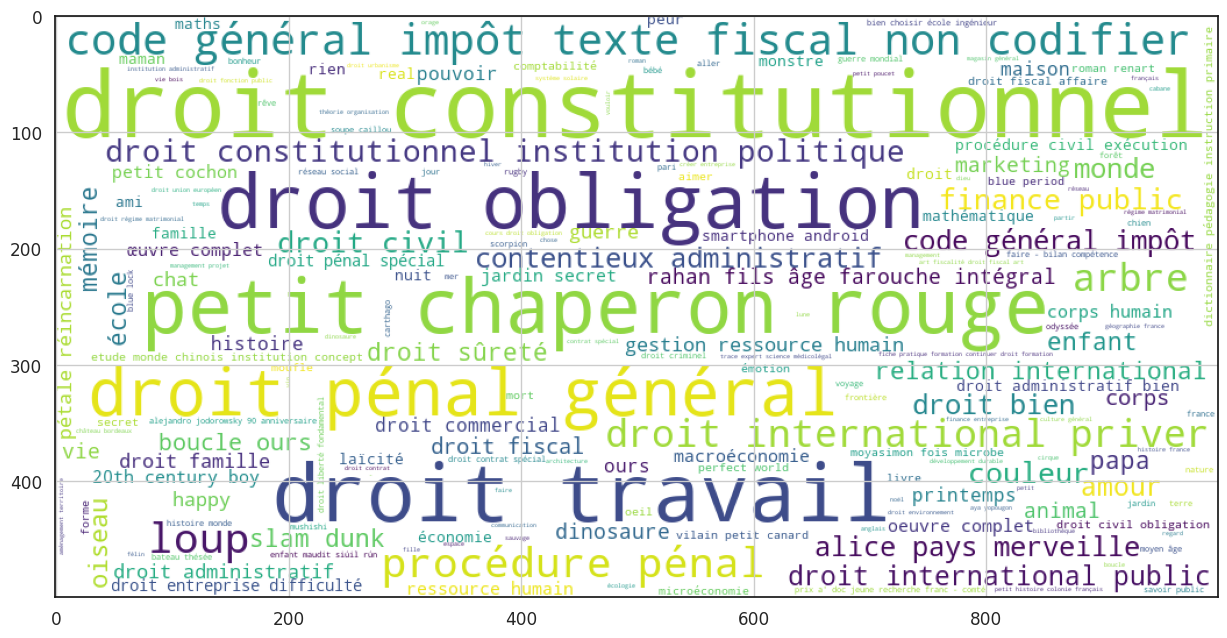

In [20]:
plot_wordcloud(df['TITRE_processed'])

# Exploration des résumés

In [21]:
# Preproces des résumés
process = PreprocessData(
    df = df,
    input_col="RESUME",
    output_col="RESUME_processed",
    add_words=add_words,
    numeric=False,
    stopw=True,
    stem=False,
    lem=True)

In [22]:
# Get df
df = process.df

In [23]:
# Exemple
idx = 12945
print("Résumé brut: \n", df['RESUME'].iloc[idx])
print("\nRésumé après processing :\n", df['RESUME_processed'].iloc[idx ])

Résumé brut: 
 Avocat, thé, cacao, curry, épices, mais aussi couscous ou macaroni: la liste est longue des saveurs et des cuisines venues d'ailleurs qui ont enrichi notre gastronomie. Comment sont-elles venues jusqu'à nous? Ce mouvement lent et discontinu, sur plusieurs siècles, reflète-t-il notre rapport avec les mondes étrangers? À des périodes d'ouverture liées à l'évolution des mentalités, ont succédé des moments de rejet au gré des crises et des résurgences du nationalisme. Car manger la nourriture des autres, c'est entretenir à la fois notre imaginaire et notre corps. En l'espace de deux siècles, l'intérêt pour les cultures culinaires différentes s'est accru dans le monde: la gastronomie a, dans un souci de renouvellement des plaisirs de la table, intégré ces nouveautés, tout en les adaptant aux cuisines nationales. Intimement lié aux mouvements de population, aux aventures coloniales, aux guerres et aux crises, ce «goût de l'étranger» se révèle ici un exercice subtil qui, au fil

# Exploration des description (titre+ resumé)

In [24]:
# Preproces des descriptions
process = PreprocessData(
    df = df,
    input_col="DESCR",
    output_col="DESCR_processed",
    add_words=add_words,
    numeric=False,
    stopw=True,
    stem=False,
    lem=True)

In [25]:
# Get df
df = process.df

In [26]:
df.to_pickle(os.path.join(data_path, "working_data_sans_dewey_processed.pkl"))

In [27]:
# Exemple
idx = 6549
print("Description brute: \n", df['DESCR'].iloc[idx])
print("\nDescription après processing :\n", df['DESCR_processed'].iloc[idx])

Description brute: 
 Savoir et pouvoir dans la modernisation du Japon La quatrième de couverture indique : "En se référant au Japon, ce livre étudie la catégorie du moderne et les notions qui lui sont associées : modernisation, modernité, post-modernité, etc. Cette catégorie est indissociable de la conception et du rôle de la connaissance dans l'évolution des sociétés. Un thème recoupe les problèmes traités, celui de la nation, du rôle des intellectuels dans la construction des mythologies nationales. L'étude du Japon permet une distanciation par rapport aux discours que les sociétés occidentales tiennent sur elles-mêmes. L'objectif est de proposer un modèle permettant de comprendre et comparer des trajectoires évolutives différentes. En se fondant sur l'exemple japonais, on peut construire une nouvelle intelligibilité du processus de modernisation, et proposer une conceptualisation des relations actuelles entre science, technologie et société post-industrielle. L'idée d'une "société d

In [28]:
# Define vectorization
vectorizer = TfidfVectorizer(
    max_features=100,
    ngram_range=(1, 3),
    min_df=3,
    max_df=0.95)

In [29]:
# Vectorization
feature = 'DESCR_processed'
cv_transform = vectorizer.fit_transform(df[feature])
print("Dimensions de la matrice", cv_transform.shape)

Dimensions de la matrice (154447, 100)


In [30]:
# Représentation TSNE des descriptions
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123, init="random")
vectorised_documents = tsne.fit_transform(cv_transform)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 154447 samples in 0.002s...


[t-SNE] Computed neighbors for 154447 samples in 297.808s...
[t-SNE] Computed conditional probabilities for sample 1000 / 154447
[t-SNE] Computed conditional probabilities for sample 2000 / 154447
[t-SNE] Computed conditional probabilities for sample 3000 / 154447
[t-SNE] Computed conditional probabilities for sample 4000 / 154447
[t-SNE] Computed conditional probabilities for sample 5000 / 154447
[t-SNE] Computed conditional probabilities for sample 6000 / 154447
[t-SNE] Computed conditional probabilities for sample 7000 / 154447
[t-SNE] Computed conditional probabilities for sample 8000 / 154447
[t-SNE] Computed conditional probabilities for sample 9000 / 154447
[t-SNE] Computed conditional probabilities for sample 10000 / 154447
[t-SNE] Computed conditional probabilities for sample 11000 / 154447
[t-SNE] Computed conditional probabilities for sample 12000 / 154447
[t-SNE] Computed conditional probabilities for sample 13000 / 154447
[t-SNE] Computed conditional probabilities for samp

In [31]:
# Build dataframe
tsne_df = pd.DataFrame()
tsne_df["comp-1"] = vectorised_documents[:,0]
tsne_df["comp-2"] = vectorised_documents[:,1]

/tmp/ipykernel_4143077/902094180.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="comp-1", y="comp-2",


[Text(0.5, 1.0, 'Notice description T-SNE projection')]

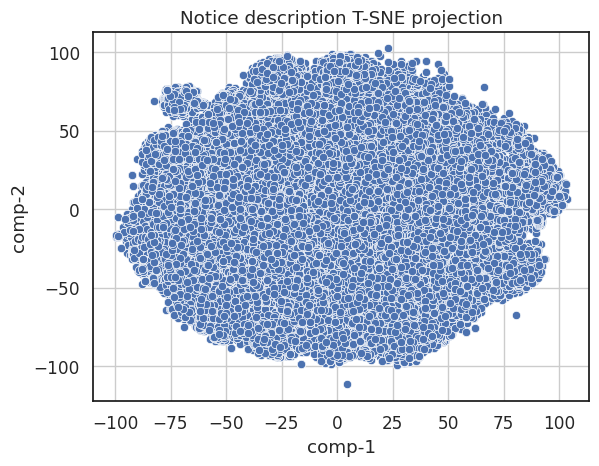

In [32]:
# Plot TSNE result
sns.scatterplot(x="comp-1", y="comp-2", 
                palette=sns.color_palette("hls", 25),
                data=tsne_df).set(title="Notice description T-SNE projection") 